# Entrentien Technique OBS

**3 heures + 30min de présentation des résultats**

## Problématique

Vous trouverez en pièce jointes les données (1 fichier, 7043 lignes, 22 colonnes).

 

L’objectif est de construire un modèle estimant la probabilité qu’un client quitte l’entreprise (= scoring).

 

Quelques informations sur les données :

·        `Cust_ID` : ID client

·         `Churn` : variable « cible » indiquant si le client nous a quitté.

 

Nous ferons un point cette après-midi pour parcourir les résultats obtenus et la méthodologie. Inutile de prévoir des slides, nous pourrons passez en revue le code et vous expliquerez votre démarche à partir de celui-ci. Vous pouvez faire quelques graphiques pour illustrer les résultats si vous le souhaiter, le plus important étant le fond et non la forme. Pour gagner du temps, je vous conseille de vous concentrer sur un seul modèle. L’essentiel est de pouvoir l’expliquer et interpréter ses résultats, même si ce n’est pas le modèle le plus optimal qu’on puisse trouver. Vous pouvez rédiger votre code dans le langage de votre choix.

 

Vous pouvez me renvoyer votre travail à vers 13h, nous les parcourrons ensemble à 15h.

 

Parmi les points que nous discuterons ensemble :

- Méthodologie utilisée

- Remarques générales sur les données

- Prétraitement des données

- Modèle choisi : pouvoir expliquer ce qu’il fait

- Indicateurs de performance du modèle : les chiffres et comment les interpréter

- Quelques questions métiers auxquelles on pourra essayer de répondre :
    - Quelle proportion de clients quittent mon entreprise ?

    - Quels sont les facteurs expliquant le plus le départ de mes clients ?

    - Quels sont les clients qui ont le plus de risque de me quitter ?

    - Je souhaite entreprendre des actions commerciales pour conserver 50% des clients qui vont partir. Quel % de ma base dois-je cibler ? Dans ce cas, quel gain le modèle apporte-t-il par rapport à un ciblage aléatoire ?

# Analyse du Dataset 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('../Data/Data_client.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Data_client.csv'

In [6]:
data.head()

,Cust_ID,Gender,Retired,Married,Children,Months_of_service,Phone,Number_of_lines,Internet,Online_account,...,Free_support,TV_option,Spotify_option,Payment,Online_bill,Payment_method,Monthly_Extras,Monthly_Total,Churn,Contract End Year
0,cust_6008328,Female,0.0,Yes,No,1.0,No,No service,Optic fiber,No,...,No,No,No,Per month,Yes,Electronic check,29.85,29.85,No,2021
1,cust_2015480,Male,0.0,No,No,34.0,Yes,1,Optic fiber,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2023
2,cust_8282543,Male,0.0,No,No,2.0,Yes,1,Optic fiber,Yes,...,No,No,No,Per month,Yes,Mailed check,53.85,108.15,Yes,2022
3,cust_9324635,Male,0.0,No,No,45.0,No,No service,Optic fiber,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2022
4,cust_8468663,Female,0.0,No,No,2.0,Yes,1,ADSL,No,...,No,No,No,Per month,Yes,Electronic check,70.70,151.65,Yes,2022


In [7]:
data.shape

(7043, 22)

## Types de données

In [8]:
df = data.copy()

In [9]:
df.dtypes.value_counts()

object     18
float64     3
int64       1
dtype: int64

In [39]:
df.dtypes

Gender                object
Retired              float64
Married               object
Children              object
Months_of_service    float64
Phone                 object
Number_of_lines       object
Internet              object
Online_account        object
Backup_service        object
Phone_protection      object
Free_support          object
TV_option             object
Spotify_option        object
Payment               object
Online_bill           object
Payment_method        object
Monthly_Extras       float64
Monthly_Total        float64
Churn                 object
Contract End Year      int64
dtype: object

## Valeurs Manquantes

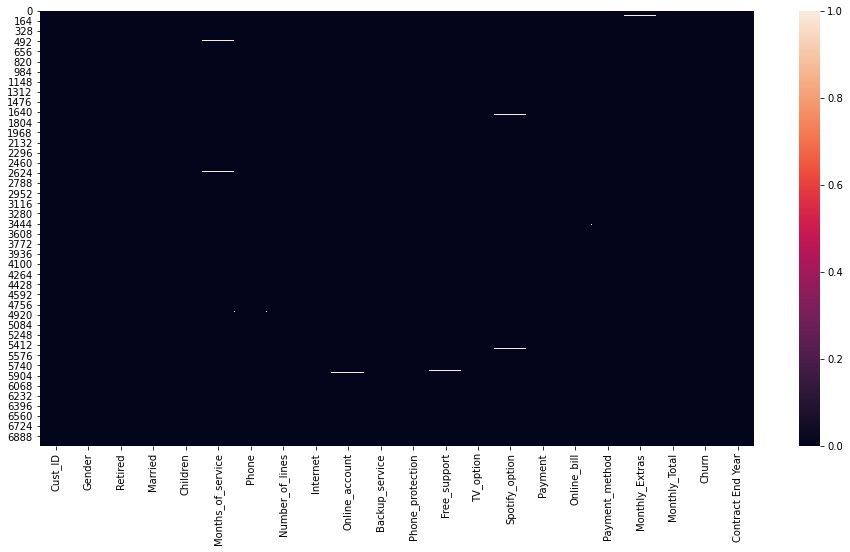

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.isna())

- Nombre de Nan par colonnes, trié du plus grand au plus petit

In [187]:
df.isna().sum().sort_values(ascending=False)

Monthly_Total        15
Payment_method       11
Gender               10
Online_account        9
TV_option             9
Phone                 8
Spotify_option        8
Payment               8
Online_bill           7
Married               7
Months_of_service     7
Free_support          7
Monthly_Extras        6
Retired               6
Number_of_lines       5
Phone_protection      4
Backup_service        4
Children              4
Internet              3
Churn                 0
Contract End Year     0
dtype: int64

In [13]:
df.columns

Index(['Cust_ID', 'Gender', 'Retired', 'Married', 'Children',
       'Months_of_service', 'Phone', 'Number_of_lines', 'Internet',
       'Online_account', 'Backup_service', 'Phone_protection', 'Free_support',
       'TV_option', 'Spotify_option', 'Payment', 'Online_bill',
       'Payment_method', 'Monthly_Extras', 'Monthly_Total', 'Churn',
       'Contract End Year'],
      dtype='object')

## Suppression col 'Cust_ID'

In [14]:
df = df.drop(columns='Cust_ID')

In [15]:
df.head()

,Gender,Retired,Married,Children,Months_of_service,Phone,Number_of_lines,Internet,Online_account,Backup_service,...,Free_support,TV_option,Spotify_option,Payment,Online_bill,Payment_method,Monthly_Extras,Monthly_Total,Churn,Contract End Year
0,Female,0.0,Yes,No,1.0,No,No service,Optic fiber,No,Yes,...,No,No,No,Per month,Yes,Electronic check,29.85,29.85,No,2021
1,Male,0.0,No,No,34.0,Yes,1,Optic fiber,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2023
2,Male,0.0,No,No,2.0,Yes,1,Optic fiber,Yes,Yes,...,No,No,No,Per month,Yes,Mailed check,53.85,108.15,Yes,2022
3,Male,0.0,No,No,45.0,No,No service,Optic fiber,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2022
4,Female,0.0,No,No,2.0,Yes,1,ADSL,No,No,...,No,No,No,Per month,Yes,Electronic check,70.70,151.65,Yes,2022


In [16]:
df["Retired"].value_counts()

0.0    5896
1.0    1141
Name: Retired, dtype: int64

## Varb Continue 
**3 colonnes**


### Transforme String to digit 

In [31]:
df['Monthly_Total'] = pd.to_numeric(df['Monthly_Total'],errors='coerce')


In [33]:
df.select_dtypes('float').columns

Index(['Retired', 'Months_of_service', 'Monthly_Extras', 'Monthly_Total'], dtype='object')

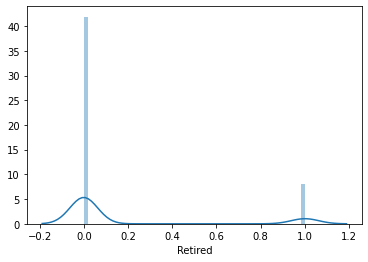

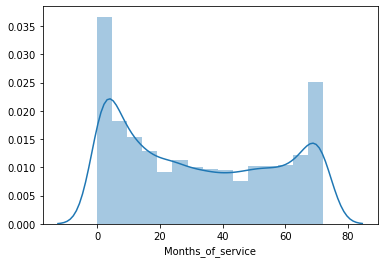

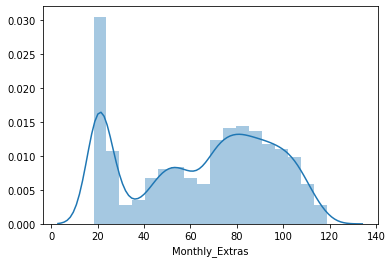

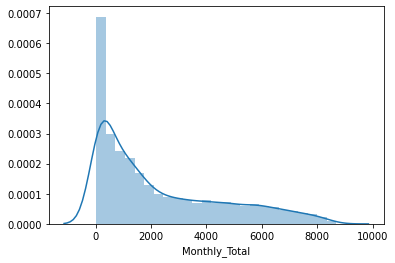

In [41]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [42]:
df.select_dtypes('int64').columns

Index(['Contract End Year'], dtype='object')

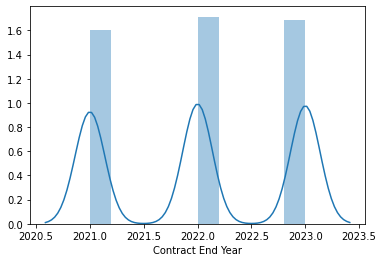

In [43]:
plt.figure()
sns.distplot(df['Contract End Year'])

## Varb Qualitatives
**17 colonnes**

In [35]:
df.select_dtypes('object').columns

Index(['Gender', 'Married', 'Children', 'Phone', 'Number_of_lines', 'Internet',
       'Online_account', 'Backup_service', 'Phone_protection', 'Free_support',
       'TV_option', 'Spotify_option', 'Payment', 'Online_bill',
       'Payment_method', 'Churn'],
      dtype='object')

**Y Churn**

In [36]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [185]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30}, {df[col].unique()}')

### Nombre de valeurs par Catégorie

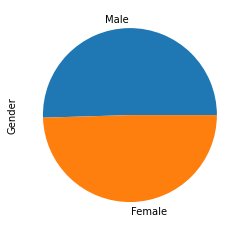

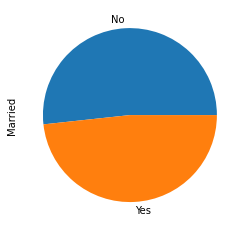

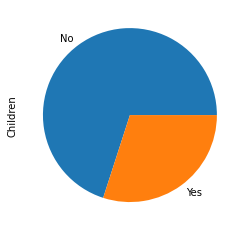

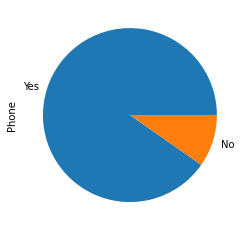

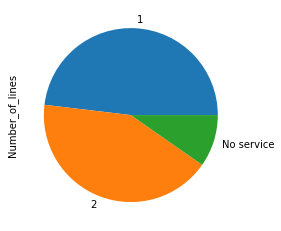

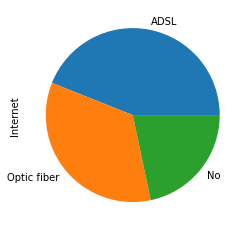

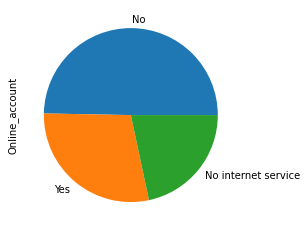

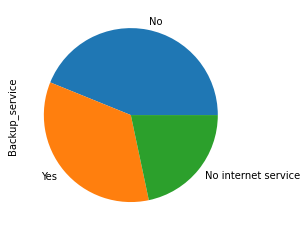

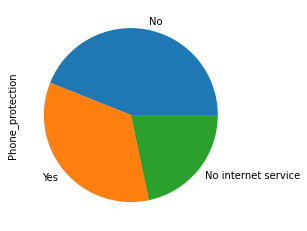

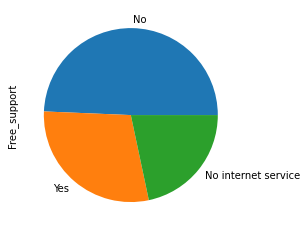

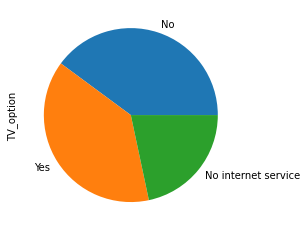

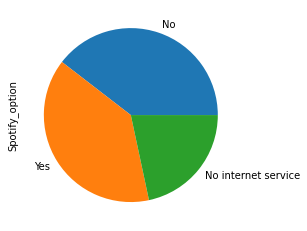

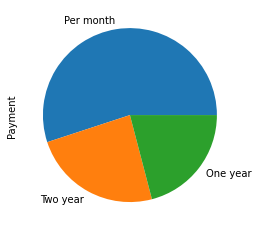

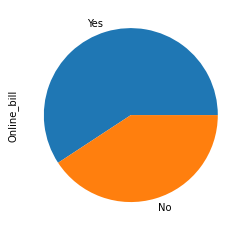

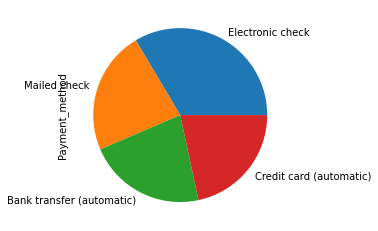

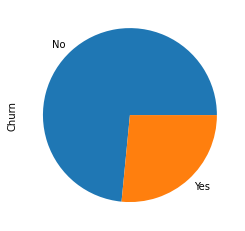

In [38]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Coréllation de variable

In [168]:
reste_df = df[df["Churn"] == 0]

In [169]:
quitte_df = df[df["Churn"] == 1]

In [170]:
quitte_df.shape, reste_df.shape

((1869, 21), (5174, 21))

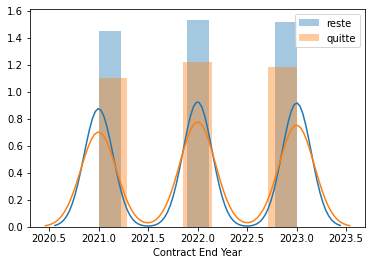

In [171]:
plt.figure()
sns.distplot(reste_df['Contract End Year'], label='reste')
sns.distplot(quitte_df['Contract End Year'], label='quitte')
plt.legend()

### groupe de Variable "Monthly"

In [188]:
months_col = df[df.select_dtypes('float').columns]

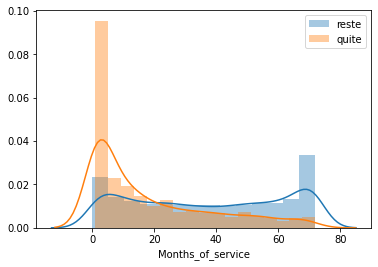

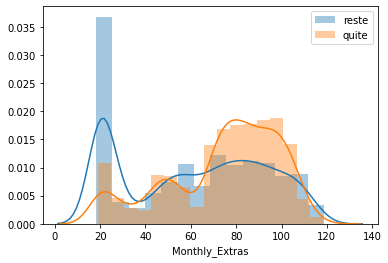

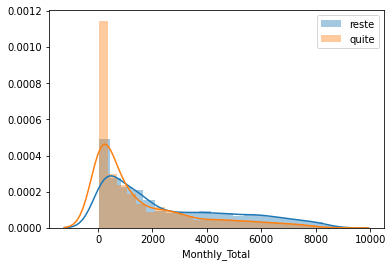

In [195]:
for col in df[['Months_of_service', 'Monthly_Extras', 'Monthly_Total']]:
    plt.figure()
    sns.distplot(reste_df[col], label='reste')
    sns.distplot(quitte_df[col], label='quite')
    plt.legend()
    

# Pre-processing

In [45]:
df.head()

,Gender,Retired,Married,Children,Months_of_service,Phone,Number_of_lines,Internet,Online_account,Backup_service,...,Free_support,TV_option,Spotify_option,Payment,Online_bill,Payment_method,Monthly_Extras,Monthly_Total,Churn,Contract End Year
0,Female,0.0,Yes,No,1.0,No,No service,Optic fiber,No,Yes,...,No,No,No,Per month,Yes,Electronic check,29.85,29.85,No,2021
1,Male,0.0,No,No,34.0,Yes,1,Optic fiber,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2023
2,Male,0.0,No,No,2.0,Yes,1,Optic fiber,Yes,Yes,...,No,No,No,Per month,Yes,Mailed check,53.85,108.15,Yes,2022
3,Male,0.0,No,No,45.0,No,No service,Optic fiber,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,2022
4,Female,0.0,No,No,2.0,Yes,1,ADSL,No,No,...,No,No,No,Per month,Yes,Electronic check,70.70,151.65,Yes,2022


## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
train_set, test_set = train_test_split(df, test_size=0.2,
                                       random_state=5)

## Variables Qualitatives
### Encodage de varb Char

In [52]:
def encodage(df):
    encodage = {"Yes": 1, "No": 0,
            "Female": 0, "Male": 1,
            'No service': 0, '1': 1, '2' : 2,
            'Optic fiber': 1,  'ADSL':2,
            'No internet service':2,
            'Per month': 0, 'One year':1, 'Two year':2,
            'Electronic check':1, 'Mailed check':2, 
            'Bank transfer (automatic)':3, 
            'Credit card (automatic)':0
           }
    
    
    for col in df.select_dtypes('object').columns:
        df.loc[:, col] = df[col].map(encodage)
        
    return df

In [63]:
encodage(train_set)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Gender,Retired,Married,Children,Months_of_service,Phone,Number_of_lines,Internet,Online_account,Backup_service,...,Free_support,TV_option,Spotify_option,Payment,Online_bill,Payment_method,Monthly_Extras,Monthly_Total,Churn,Contract End Year
5860,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,70.00,153.05,1,2023
2458,1.0,1.0,1.0,0.0,50.0,1.0,2.0,2.0,1.0,0.0,...,0.0,1.0,1.0,2.0,1.0,0.0,105.05,5163.30,0,2022
5879,1.0,0.0,1.0,0.0,33.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,2.0,1.0,2.0,61.05,2018.40,0,2022
4708,0.0,0.0,1.0,1.0,56.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,1.0,0.0,61.30,3346.80,0,2021
1293,1.0,0.0,1.0,1.0,67.0,1.0,2.0,2.0,0.0,1.0,...,1.0,1.0,1.0,2.0,1.0,3.0,111.20,7530.80,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,0.0,0.0,1.0,0.0,61.0,1.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,3.0,103.30,6518.35,0,2022
1725,0.0,1.0,0.0,0.0,17.0,1.0,2.0,2.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,94.20,1608.15,0,2022
4079,0.0,0.0,1.0,0.0,10.0,1.0,2.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,78.15,765.15,0,2022
2254,1.0,1.0,1.0,0.0,72.0,1.0,2.0,2.0,1.0,1.0,...,1.0,0.0,0.0,2.0,1.0,3.0,93.05,6735.05,0,2021


In [64]:
encodage(test_set)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Gender,Retired,Married,Children,Months_of_service,Phone,Number_of_lines,Internet,Online_account,Backup_service,...,Free_support,TV_option,Spotify_option,Payment,Online_bill,Payment_method,Monthly_Extras,Monthly_Total,Churn,Contract End Year
4213,0.0,0.0,0.0,0,6.0,1.0,1.0,1,0.0,0,...,1.0,0.0,0.0,0.0,1,3.0,50.80,288.05,1,2023
5035,1.0,0.0,0.0,0,20.0,1.0,1.0,2,0.0,0,...,0.0,1.0,0.0,0.0,0,1.0,78.80,1641.30,0,2021
3713,1.0,1.0,1.0,0,46.0,1.0,1.0,2,0.0,0,...,0.0,0.0,1.0,0.0,1,1.0,80.40,3605.20,1,2022
1720,0.0,1.0,0.0,0,2.0,1.0,1.0,2,0.0,1,...,0.0,1.0,0.0,0.0,1,3.0,83.80,163.70,0,2022
234,0.0,0.0,0.0,0,29.0,1.0,2.0,0,2.0,2,...,2.0,2.0,2.0,0.0,0,1.0,25.15,702.00,0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,0.0,0.0,0.0,1,NaN,1.0,1.0,1,0.0,0,...,1.0,1.0,1.0,0.0,1,0.0,69.40,571.45,0,2021
3809,1.0,0.0,0.0,0,50.0,1.0,1.0,0,2.0,2,...,2.0,2.0,2.0,1.0,0,0.0,20.15,989.05,0,2022
6196,1.0,0.0,0.0,0,69.0,1.0,2.0,2,1.0,1,...,0.0,1.0,1.0,2.0,1,0.0,110.05,7430.75,0,2022
6092,0.0,0.0,1.0,0,72.0,1.0,2.0,2,1.0,1,...,1.0,0.0,0.0,2.0,1,3.0,94.25,6849.75,0,2021


## Feature Engineering  


## Suppression des NaN

In [196]:
df.shape

(7043, 21)

In [197]:
train_set.shape

(5524, 21)

In [110]:
train_set.dropna(axis=0, inplace=True)

<ipython-input-110-8fc53dc86422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.dropna(axis=0, inplace=True)


In [112]:
test_set.dropna(axis=0, inplace=True)

<ipython-input-112-0f02921997c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.dropna(axis=0, inplace=True)


In [114]:
test_set.isna().sum()

Gender               0
Retired              0
Married              0
Children             0
Months_of_service    0
Phone                0
Number_of_lines      0
Internet             0
Online_account       0
Backup_service       0
Phone_protection     0
Free_support         0
TV_option            0
Spotify_option       0
Payment              0
Online_bill          0
Payment_method       0
Monthly_Extras       0
Monthly_Total        0
Churn                0
Contract End Year    0
dtype: int64

# Modélisation

## Split 

In [115]:
X_train = train_set.drop('Churn', axis=1)
y_train = train_set['Churn']

In [116]:
X_train.shape, y_train.shape

((5524, 20), (5524,))

In [117]:
y_train.value_counts()

0    4066
1    1458
Name: Churn, dtype: int64

In [118]:
X_test = test_set.drop('Churn', axis=1)
y_test = test_set['Churn']

In [119]:
y_test.value_counts()

0    1002
1     380
Name: Churn, dtype: int64

## Modèles

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [183]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

In [123]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

## Fonction d'évaluation

In [132]:
def eval_score(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1')
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='val score')
    plt.legend()

### Modèle1

In [166]:
model_1 = RandomForestClassifier(random_state=3)

[[904  98]
 [189 191]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1002
           1       0.66      0.50      0.57       380

    accuracy                           0.79      1382
   macro avg       0.74      0.70      0.72      1382
weighted avg       0.78      0.79      0.78      1382



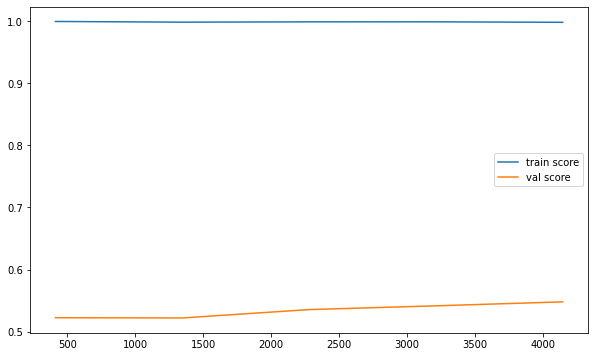

In [133]:
eval_score(model_1)

In [151]:
pd.DataFrame(model_1.feature_importances_, 
             index=X_train.columns)

,0
Gender,0.027049
Retired,0.019119
Married,0.021747
Children,0.018101
Months_of_service,0.147095
Phone,0.004599
Number_of_lines,0.023546
Internet,0.035712
Online_account,0.048860
Backup_service,0.023951


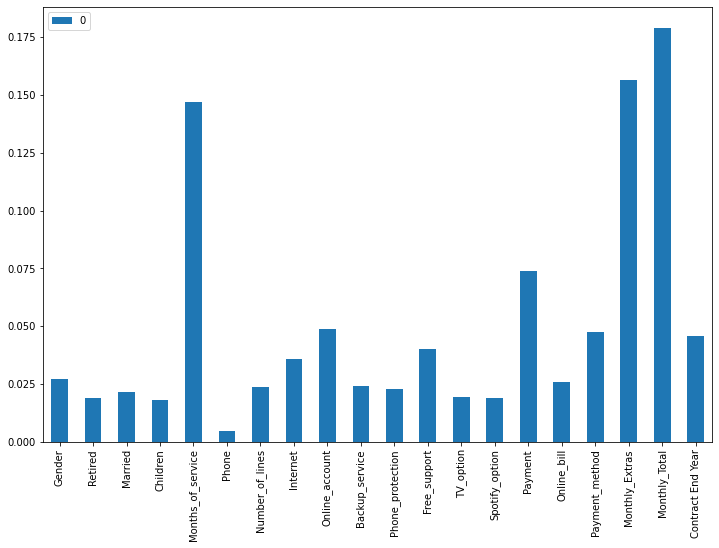

In [150]:
pd.DataFrame(model_1.feature_importances_, 
             index=X_train.columns).plot.bar(figsize=(12, 8))


## Amèlioration du modèle 

- Selection des meilleurs variable pour le modele avec `selectKbest`, avec un test `f_classif`

In [179]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=8))


In [180]:
model_2 = make_pipeline(preprocessor, 
                        RandomForestClassifier(random_state=0))


[[832 170]
 [179 201]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1002
           1       0.54      0.53      0.54       380

    accuracy                           0.75      1382
   macro avg       0.68      0.68      0.68      1382
weighted avg       0.75      0.75      0.75      1382



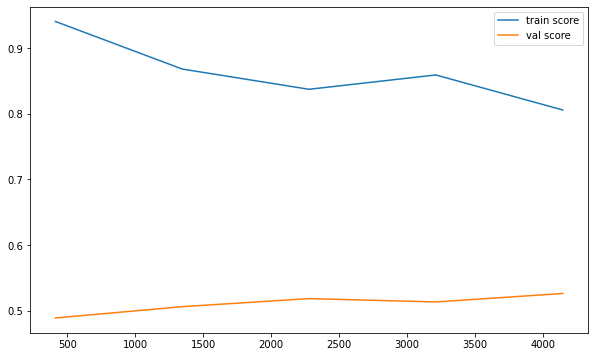

In [181]:
eval_score(model_2)